In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('data.csv',on_bad_lines='skip')

In [3]:
##Lets check the head of our data
dataset.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
##Lets check the shape of data
dataset.shape

(669640, 2)

In [5]:
##Checking the unique values in strength
dataset["strength"].unique()

array([1, 2, 0], dtype=int64)

### There are only 3 classes in strength
### 0->Password is weak
### 1->Normal password
### 2->Strong password

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [7]:
##Lets see if there are any null values in dataset
dataset.isnull().sum()

password    1
strength    0
dtype: int64

There is 1 null value in password

In [8]:
##Lets check the record where our value is null
dataset[dataset["password"].isnull()]

,password,strength
367579,NaN,0


As there is only 1 record we can drop our nan values

In [9]:
dataset.dropna(inplace=True)

<Axes: xlabel='strength', ylabel='count'>

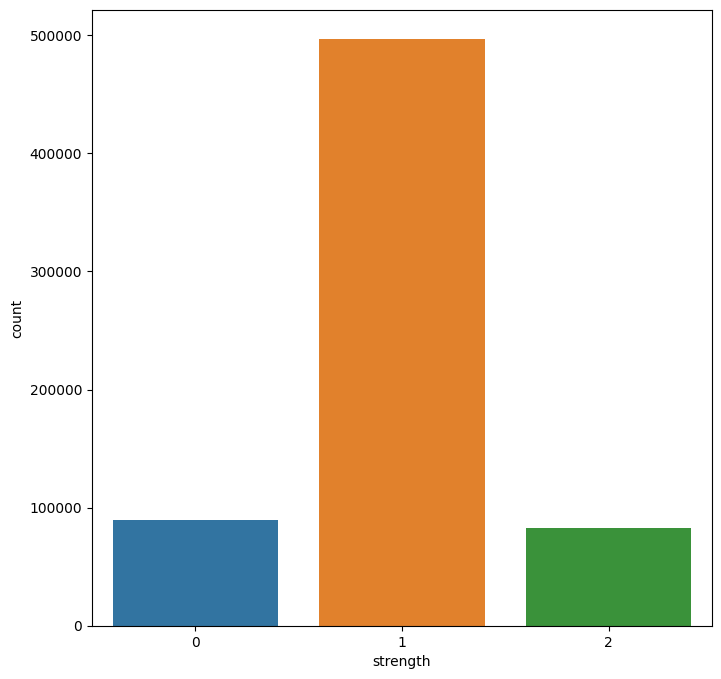

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x=dataset["strength"])

As we can see count of class 1 is every high compared to class 0 and class 2

In [11]:
##I'll convert my data to array
password_=np.array(dataset)
password_

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [12]:
type(password_)

numpy.ndarray

In [13]:
password_[0]

array(['kzde5577', 1], dtype=object)

In [14]:
##Extracting the password from data
password_[0][0]

'kzde5577'

In [15]:
import random
random.shuffle(password_)

In [16]:
password_

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['jyhjan0815', 1],
       ['dyrysij437', 1],
       ['vnFqUODkyMQYT9Db', 2]], dtype=object)

In [17]:
##Create my dependant and independant feature
X=[passwords[0] for passwords in password_]
y=[passwords[1] for passwords in password_]

In [18]:
##Lets check passwords
X

['kzde5577',
 'kino3434',
 'visi7k1yr',
 'visi7k1yr',
 'lamborghin1',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'kzde5577',
 'lamborghin1',
 'megzy123',
 'universe2908',
 '612035180tok',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'as326159',
 'g067057895',
 'asv5o9yu',
 'idofo673',
 'megzy123',
 'WUt9IZzE0OQ7PkNE',
 'kzde5577',
 'visi7k1yr',
 '52558000aaa',
 'czuodhj972',
 'asv5o9yu',
 'kzde5577',
 'kino3434',
 '52558000aaa',
 'czuodhj972',
 '0169395484a',
 'kino3434',
 'klara-tershina3H',
 'faranumar91',
 'intel1',
 'universe2908',
 '0169395484a',
 'universe2908',
 'elyass15@ajilent-ci',
 'kswa2mrv',
 'schalke04',
 'klara-tershina3H',
 'megzy123',
 'as326159',
 'memjan123',
 'gaymaids1',
 '6975038lp',
 'klara-tershina3H',
 'alimagik1',
 'fahad123',
 'a2531106',
 'a2531106',
 'kswa2mrv',
 'ok>bdk',
 'yqugu927',
 'yqugu927',
 'u6c8vhow',
 'juliel009',
 'lamborghin1',
 'juliel009',
 'visi7k1yr',
 'megzy123',
 'tamanagung6',
 'sknq7m0',
 'WUt9IZzE0OQ7PkNE',
 'as326159',
 'bgrvl80',
 'prisonbreak1',
 'u6

In [19]:
type(X)

list

In [20]:
##Convert words into characters
def make_chars(inputs):
    characters=[]
    for letter in inputs:
        characters.append(letter)
    return characters

In [21]:
make_chars("MinorProject")

['M', 'i', 'n', 'o', 'r', 'P', 'r', 'o', 'j', 'e', 'c', 't']

In [22]:
vectorizer=TfidfVectorizer(tokenizer=make_chars)

In [23]:
X_=vectorizer.fit_transform(X)

In [24]:
X_.shape

(669639, 134)

In [25]:
vectorizer.get_feature_names_out()

array(['\x01', '\x02', '\x05', '\x06', '\x08', '\x0f', '\x10', '\x11',
       '\x13', '\x16', '\x17', '\x19', '\x1b', '\x1c', '\x1d', '\x1e',
       ' ', '!', '"', '#', '$', '%', '&', '(', ')', '*', '+', '-', '.',
       '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '<',
       '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}',
       '~', '\x7f', '\x81', '\x8d', '\xa0', '¡', '¢', '¦', '¨', '«', '¯',
       '°', '±', '²', '³', '´', 'µ', '·', 'º', '¼', '¾', '¿', '×', 'ß',
       'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'é', 'ê', 'í', 'ð', 'ñ', 'ò',
       'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', '—',
       '‚', '…', '™'], dtype=object)

In [26]:
X_[0]

<1x134 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [27]:
first_=X_[0].T.todense()

In [28]:
vec=pd.DataFrame(first_,index=vectorizer.get_feature_names_out(),columns=['tfidf'])

In [29]:
vec

,tfidf
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ÿ,0.0
—,0.0
‚,0.0
…,0.0


In [30]:
vec.sort_values(by=['tfidf'],ascending=False)

,tfidf
7,0.591495
5,0.567022
z,0.336074
k,0.291750
d,0.285920
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


In [31]:

x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.27,random_state=42)

In [32]:
x_train.shape,x_test.shape

((488836, 134), (180803, 134))

In [33]:
#Model
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn import svm

In [34]:
classifier=[]
classifier.append(LogisticRegression(multi_class='multinomial',solver='newton-cg',n_jobs=-1))
classifier.append(xgb.XGBClassifier(n_jobs=-1))
classifier.append(RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0))
classifier.append(svm.SVC(kernel='linear', C = 1.0))
classifier.append(KMeans(n_clusters = 3, random_state = 0, n_init='auto'))
classifier.append(neighbors.KNeighborsRegressor(n_neighbors = 3))
classifier.append(MultinomialNB())
classifier.append(MLPClassifier(alpha=1, max_iter=1000, random_state=42))
classifier.append(DecisionTreeClassifier(max_depth=5, random_state=42)) 

In [35]:
classifier

[LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='newton-cg'),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0),
 SVC(kernel='linear'),
 KMeans(n_clusters=3, n_init='auto', random_state=0),
 KN

In [ ]:
result=[]
for model in classifier:
    a=model.fit(x_train,y_train)
    result.append(a.score(x_test,y_test))

In [ ]:
result1=pd.DataFrame({'score':result,
                      'algorithms':['logistic Regression','xgboost','Random Forest','SVM','K means','KNN','naive bayes','MLP','Decision Tree']})

In [ ]:
result1

In [ ]:
plt.figure(figsize=(8,8))
a=sns.barplot(x='score',y='algorithms',data=result1)
a.set_label('accuracy')

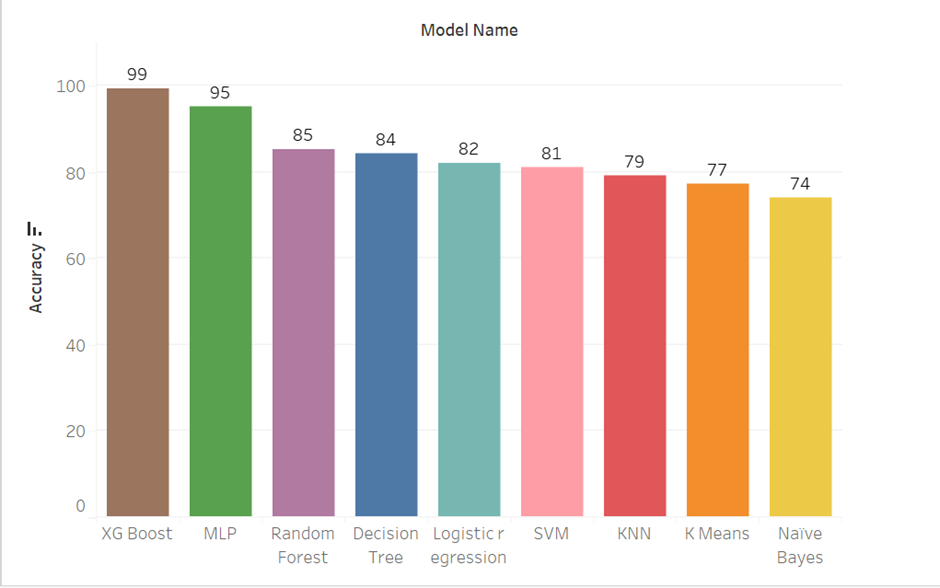

As we can see that XGBoost performs good for that given data 

In [ ]:
import time
for model in classifier:
    model_name = classifier.__class__.__name__
    
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    print(f"{model_name} Training Time: {training_time} seconds")

In [ ]:
result2=pd.DataFrame({'time':training_time,
                      'algorithms':['logistic Regression','xgboost','Random Forest','SVM','K means','KNN','naive bayes','MLP','Decision Tree']})

In [ ]:
plt.figure(figsize=(8,8))
a=sns.barplot(x='time',y='algorithms',data=result2)
a.set_label('time')

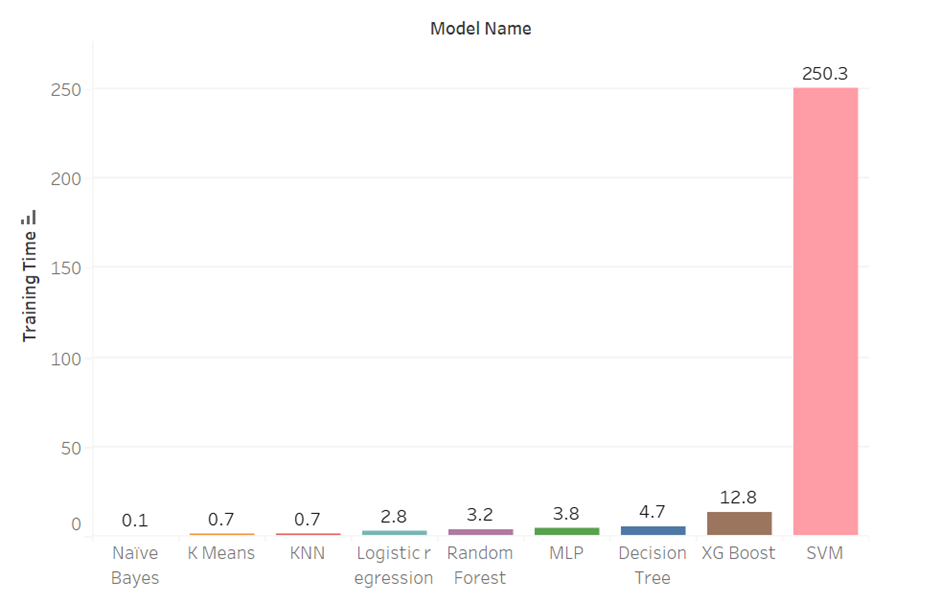